In [19]:
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

In [20]:
def process_image(image):
    #image preprocessing
    gray1= cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur= cv2.GaussianBlur(gray1, (5,5), 0)
    plt.imshow(blur, cmap='gray') 
    #canny
    low_t = 50
    high_t = 140
    canphoto = cv2.Canny(blur, low_t, high_t)
    # choose ROI
    mask = np.zeros_like(canphoto)  
    imshape = canphoto.shape
    if len(canphoto.shape) > 2:
        channel_count = canphoto.shape[2]
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255
    vertices = np.array([[(imshape[1]/8,imshape[0]),(-80+imshape[1]/2,3*imshape[0]/5), (80+imshape[1]/2,3*imshape[0]/5), ((7*imshape[1])/8,imshape[0])]], dtype=np.int32)
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    masked_edges = cv2.bitwise_and(canphoto, mask)
    #hough tansformation
    rho= 1
    theta = np.pi/180
    threshold = 10
    min_line_length = 80
    max_line_gap = 80
    line_image = np.copy(image)*0
    lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)
    #lines classification
    def draw_lines(img, lines, color, thickness):
        left_lines = []
        right_lines = []
        for line in lines:
            for x1,y1,x2,y2 in line:
                fit = np.polyfit((x1,x2),(y1,y2),1) 
            if fit[0]<-0.35: 
                left_lines.append(line)
            elif fit[0]>0.35: 
                right_lines.append(line)
    # one line left for each side
        if len(left_lines)>1:   
            left_array=np.vstack(left_lines) 
            x1_l=np.min(left_array[:,0]) 
            x2_l=np.max(left_array[:,2]) 
            y1_l=left_array[np.argmin(left_array[:,0]),1] 
            y2_l=left_array[np.argmax(left_array[:,2]),3] 
            kl = float((y2_l-y1_l)/(x2_l-x1_l)) # gradient of average line
            bl = y1_l- kl * x1_l # bias
            x_lb =float((imshape[0]-bl)/kl)
        cv2.line(img,(round(x_lb),imshape[0]),(x2_l,y2_l),color,thickness)
        if len(right_lines)>1:   
            right_array=np.vstack(right_lines) 
            x1_r=np.min(right_array[:,0]) 
            x2_r=np.max(right_array[:,2]) 
            y1_r=right_array[np.argmin(right_array[:,0]),1] 
            y2_r=right_array[np.argmax(right_array[:,2]),3] 
            kr = float((y2_r-y1_r)/(x2_r-x1_r)) # gradient of average line
            br = y1_r- kr * x1_r # bias
            x_rb = float((imshape[0]-br)/kr)
        cv2.line(img,(x1_r,y1_r),(round(x_rb),imshape[0]),color,thickness)
    draw_lines(line_image, lines, color=[255, 0, 0], thickness=4)
    # combination of line and raw image
    final = cv2.addWeighted(image, 0.8, line_image, 1, 0)
    plt.imshow(final)
    return final

[MoviePy] >>>> Building video test_videos_output/solidYellowLeft.mp4
[MoviePy] Writing video test_videos_output/solidYellowLeft.mp4


100%|█████████▉| 681/682 [01:11<00:00,  9.53it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidYellowLeft.mp4 

CPU times: user 28.9 s, sys: 2.35 s, total: 31.3 s
Wall time: 1min 13s
[MoviePy] >>>> Building video test_videos_output/solidWhiteRight.mp4
[MoviePy] Writing video test_videos_output/solidWhiteRight.mp4


100%|█████████▉| 221/222 [00:21<00:00, 10.32it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_videos_output/solidWhiteRight.mp4 

CPU times: user 9.25 s, sys: 663 ms, total: 9.92 s
Wall time: 23.3 s


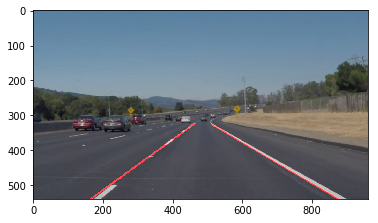

In [21]:
white_output = 'test_videos_output/solidYellowLeft.mp4'
clip = VideoFileClip("test_videos/solidYellowLeft.mp4")
white_clip = clip.fl_image(process_image) 
%time white_clip.write_videofile(white_output, audio=False)

white_output2 = 'test_videos_output/solidWhiteRight.mp4'
clip2 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip2 = clip2.fl_image(process_image) 
%time white_clip2.write_videofile(white_output2, audio=False)